# Segment + analyze blobs
In this notebook we demonstrate how images can be processed on GPUs, objects segmented and afterwards measured with [scikit-image](https://scikit-image.org/).

In [1]:
import pyclesperanto as cle
import numpy as np

from skimage.io import imread
from skimage.measure import regionprops_table
import pandas as pd

We first load an image using scikit-image's `imread()` function and visualize it using clesperanto's `imshow()` funciton, that under the hood uses similar functionality like scikit-image for showing images.

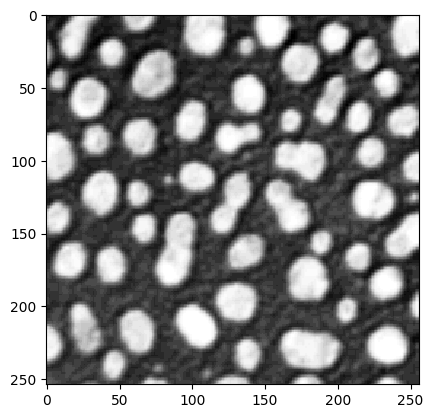

In [2]:
image = imread("https://samples.fiji.sc/blobs.png").squeeze()

cle.imshow(image)

We invert the image

We can blur this image using a `gaussian_blur` filter. All filters and image processing operations are available via the `cle.` gateway. 

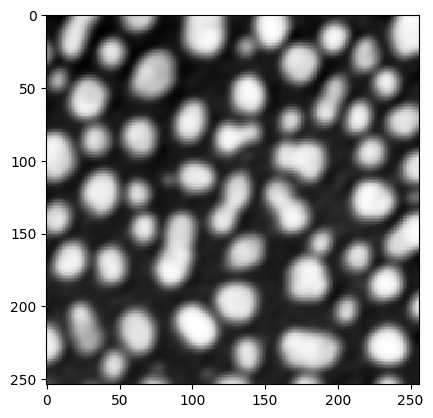

In [3]:
blurred_image = cle.gaussian_blur(image, sigma_x=3, sigma_y=3)

cle.imshow(blurred_image)

Also thresholding and connected component labeling work similarly via the `cle` gateway. Furthermore, the `imshow` function has some convenience built-in for visualizing label images of segmented blobs.

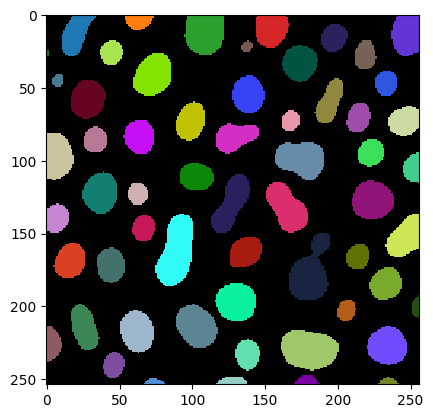

In [4]:
binary_image = cle.threshold_otsu(blurred_image)
label_image = cle.connected_components_labeling_box(binary_image)
cle.imshow(label_image, labels=True)

Before we can pass the resulting label image to another function, e.g. from scikit-image, we need to pull it back to CPU memory and with that convert it into a numpy array.

In [5]:
numpy_label_image = cle.pull(label_image)

table = regionprops_table(image, numpy_label_image, properties=['label', 'area', 'mean_intensity'])
pd.DataFrame(table)

,label,area,mean_intensity
0,8,53.0,0.000000
1,16,304.0,0.000000
2,24,1209.0,0.000000
3,32,3511.0,0.000000
4,40,7731.0,0.000000
5,48,10396.0,0.000000
6,56,7456.0,0.000000
7,64,3829.0,0.000000
8,72,1992.0,0.000000
9,80,1394.0,0.000000
